In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(-0.5, 399.5, 266.5, -0.5)

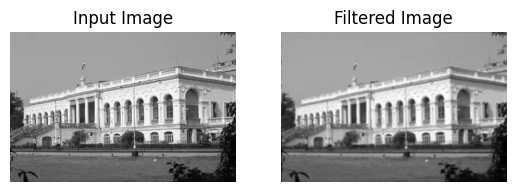

In [ ]:
# Filtering in frequency domain
import cv2
import numpy as np
import numpy.fft as n
import matplotlib.pyplot as plt

# Read image file
image = cv2.imread('/content/drive/MyDrive/Image for Image Processing/img_bgr.jpg',cv2.IMREAD_GRAYSCALE)

# Define a 3x3 averaging kernel for image smoothing
filt = np.array([[1, 1, 1],[1, 1, 1],[1, 1, 1]]) / 9

# Perform Fourier Transform on the image and filter
image_f = n.fft2(image)
filter_f = n.fft2(filt, s = image.shape)

# Multiply the Fourier transforms (convolution in the frequency domain)
conv_f = image_f * filter_f

# Perform Inverse Fourier Transform to get the convolution result in the spatial domain
smoothed_image = n.ifft2(conv_f).real

plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(smoothed_image, cmap = 'gray')
plt.title('Filtered Image')
plt.axis('off')


In [ ]:
# Assignment: High pass filtering and Band pass filtering in frequency domain

(-0.5, 627.5, 439.5, -0.5)

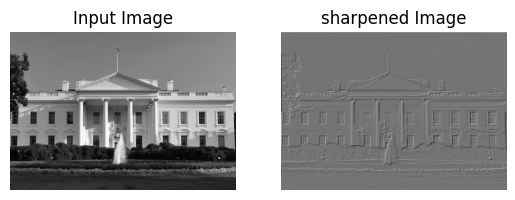

In [ ]:
import cv2
import numpy as np
import numpy.fft as n
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/Image for Image Processing/645947-whitehouse-pti.jpg',cv2.IMREAD_GRAYSCALE)


image_f = n.fft2(image)
filter_f = n.fft2(filt, s = image.shape)

sharpened_f = 1-filter_f

conv_f = image_f * sharpened_f

sharpened_image = n.ifft2(conv_f).real


plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(sharpened_image, cmap = 'gray')
plt.title('sharpened Image')
plt.axis('off')


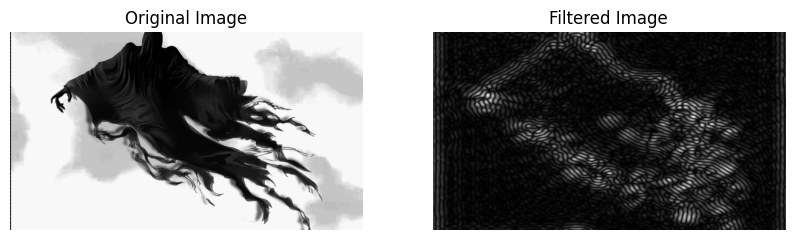

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image Processing/pxfuel(3).jpg', cv2.IMREAD_GRAYSCALE)
image_float32 = np.float32(image)

# Perform a 2D FFT on the image
image_fft = np.fft.fft2(image_float32)
image_fft_shifted = np.fft.fftshift(image_fft)

# Define the dimensions of the image
rows, cols = image.shape

# User-defined frequency range
low_cutoff = 30  # Lower cutoff frequency
high_cutoff = 50  # Upper cutoff frequency

# Create a binary bandpass filter
bandpass_filter = np.zeros((rows, cols), dtype=np.float32)
center_x, center_y = rows // 2, cols // 2
for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - center_x) ** 2 + (j - center_y) ** 2)
        if low_cutoff <= distance <= high_cutoff:
            bandpass_filter[i, j] = 1

# Apply the filter in the frequency domain
filtered_image_fft_shifted = image_fft_shifted * bandpass_filter

# Perform inverse FFT to obtain the filtered image
filtered_image_fft = np.fft.ifftshift(filtered_image_fft_shifted)
filtered_image = np.abs(np.fft.ifft2(filtered_image_fft))

# Display the original and filtered images
plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image'), plt.axis('off')
plt.show()
